# Importing Libraries

In [2]:
import pandas as pd
import scipy
import numpy as np
import sklearn
import datetime as dt
import pandas_datareader as pdr
import yfinance as yh
import seaborn as sns
import matplotlib.pyplot as plt
import bs4 as bs
import requests
from IPython.display import clear_output
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
from sklearn.model_selection import GridSearchCV
sns.set()

In [3]:
df_list = []
folder_path = '/Users/izzyhuang/Desktop/Winter 2023 Classes/NUFT/Technical-Indicator-Project/MSFT_data/'
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)
merged_df = merged_df.sort_values('ts_event')
merged_df.to_csv("MSFT_2022_Minute_data.csv")

In [4]:
all_data = pd.read_csv('/Users/izzyhuang/Desktop/Winter 2023 Classes/NUFT/Technical-Indicator-Project/MSFT_2022_Minute_data.csv')
all_data = all_data.rename(columns={'open':'Open','close': 'Close', 'high': 'High', 'low': 'Low', 'volume':'Volume', 'ticker': 'symbol'})
all_data

,Unnamed: 0.1,Unnamed: 0,ts_event,Open,High,Low,Close,Volume,product_id,symbol
0,0,6,2022-01-03 09:00:00,338.10,338.10,338.10,338.10,5,7119,MSFT
1,1,16,2022-01-03 09:01:00,338.10,338.10,338.00,338.09,13,7119,MSFT
2,2,29,2022-01-03 09:02:00,338.09,338.17,338.09,338.17,20,7119,MSFT
3,3,40,2022-01-03 09:03:00,338.33,338.53,338.30,338.53,471,7119,MSFT
4,4,51,2022-01-03 09:04:00,338.57,338.57,338.00,338.00,389,7119,MSFT
...,...,...,...,...,...,...,...,...,...,...
156127,74907,13123,2022-12-30 23:32:00,239.98,239.98,239.98,239.98,13,7091,MSFT
156128,74908,13133,2022-12-30 23:45:00,239.90,239.90,239.90,239.90,15,7091,MSFT
156129,74909,13135,2022-12-30 23:46:00,239.90,239.90,239.90,239.90,4,7091,MSFT
156130,74910,13137,2022-12-30 23:48:00,239.90,239.90,239.90,239.90,8,7091,MSFT


# Make a dictionary to convert time to readable format

In [5]:
time_lookup = {}
temp = [[i,j] for i,j in zip(all_data.index, all_data["ts_event"])]
for k in temp:
    time_lookup[k[0]] = k[1]
time_lookup

{0: '2022-01-03 09:00:00',
 1: '2022-01-03 09:01:00',
 2: '2022-01-03 09:02:00',
 3: '2022-01-03 09:03:00',
 4: '2022-01-03 09:04:00',
 5: '2022-01-03 09:05:00',
 6: '2022-01-03 09:06:00',
 7: '2022-01-03 09:07:00',
 8: '2022-01-03 09:08:00',
 9: '2022-01-03 09:09:00',
 10: '2022-01-03 09:10:00',
 11: '2022-01-03 09:11:00',
 12: '2022-01-03 09:12:00',
 13: '2022-01-03 09:13:00',
 14: '2022-01-03 09:14:00',
 15: '2022-01-03 09:15:00',
 16: '2022-01-03 09:16:00',
 17: '2022-01-03 09:17:00',
 18: '2022-01-03 09:18:00',
 19: '2022-01-03 09:19:00',
 20: '2022-01-03 09:21:00',
 21: '2022-01-03 09:22:00',
 22: '2022-01-03 09:23:00',
 23: '2022-01-03 09:25:00',
 24: '2022-01-03 09:26:00',
 25: '2022-01-03 09:27:00',
 26: '2022-01-03 09:28:00',
 27: '2022-01-03 09:29:00',
 28: '2022-01-03 09:30:00',
 29: '2022-01-03 09:31:00',
 30: '2022-01-03 09:32:00',
 31: '2022-01-03 09:33:00',
 32: '2022-01-03 09:34:00',
 33: '2022-01-03 09:36:00',
 34: '2022-01-03 09:37:00',
 35: '2022-01-03 09:38:00',
 3

# Adding the Indicators

In [6]:
#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 

###
### Simple Moving Average 
###
all_data['SMA_5'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA_15'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']

###
### Simple Moving Average Volume
###
all_data['SMA5_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA15_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_Volume_Ratio'] = all_data['SMA5_Volume']/all_data['SMA15_Volume']

###
### Wilder's Smoothing
###
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] #Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() #Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods #Wilder Smoothing
    return(Wilder)

###
### Average True Range (ATR)
###
all_data['prev_close'] = all_data.groupby('symbol')['Close'].shift(1)
all_data['TR'] = np.maximum((all_data['High'] - all_data['Low']), 
                     np.maximum(abs(all_data['High'] - all_data['prev_close']), 
                     abs(all_data['prev_close'] - all_data['Low'])))
for i in all_data['symbol'].unique():
    TR_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ATR_5'] = Wilder(TR_data['TR'], 5)
    all_data.loc[all_data.symbol==i,'ATR_15'] = Wilder(TR_data['TR'], 15)

all_data['ATR_Ratio'] = all_data['ATR_5'] / all_data['ATR_15']

###
### Average Directional Index (ADX)
###
all_data['prev_high'] = all_data.groupby('symbol')['High'].shift(1)
all_data['prev_low'] = all_data.groupby('symbol')['Low'].shift(1)

all_data['+DM'] = np.where(~np.isnan(all_data.prev_high),
                           np.where((all_data['High'] > all_data['prev_high']) & 
         (((all_data['High'] - all_data['prev_high']) > (all_data['prev_low'] - all_data['Low']))), 
                                                                  all_data['High'] - all_data['prev_high'], 
                                                                  0),np.nan)

all_data['-DM'] = np.where(~np.isnan(all_data.prev_low),
                           np.where((all_data['prev_low'] > all_data['Low']) & 
         (((all_data['prev_low'] - all_data['Low']) > (all_data['High'] - all_data['prev_high']))), 
                                    all_data['prev_low'] - all_data['Low'], 
                                    0),np.nan)

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'+DM_5'] = Wilder(ADX_data['+DM'], 5)
    all_data.loc[all_data.symbol==i,'-DM_5'] = Wilder(ADX_data['-DM'], 5)
    all_data.loc[all_data.symbol==i,'+DM_15'] = Wilder(ADX_data['+DM'], 15)
    all_data.loc[all_data.symbol==i,'-DM_15'] = Wilder(ADX_data['-DM'], 15)

all_data['+DI_5'] = (all_data['+DM_5']/all_data['ATR_5'])*100
all_data['-DI_5'] = (all_data['-DM_5']/all_data['ATR_5'])*100
all_data['+DI_15'] = (all_data['+DM_15']/all_data['ATR_15'])*100
all_data['-DI_15'] = (all_data['-DM_15']/all_data['ATR_15'])*100

all_data['DX_5'] = (np.round(abs(all_data['+DI_5'] - all_data['-DI_5'])/(all_data['+DI_5'] + all_data['-DI_5']) * 100))

all_data['DX_15'] = (np.round(abs(all_data['+DI_15'] - all_data['-DI_15'])/(all_data['+DI_15'] + all_data['-DI_15']) * 100))

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ADX_5'] = Wilder(ADX_data['DX_5'], 5)
    all_data.loc[all_data.symbol==i,'ADX_15'] = Wilder(ADX_data['DX_15'], 15)

###
### Stochastic Oscillators
###
all_data['Lowest_5D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 5).min())
all_data['High_5D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 5).max())
all_data['Lowest_15D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 15).min())
all_data['High_15D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 15).max())

all_data['Stochastic_5'] = ((all_data['Close'] - all_data['Lowest_5D'])/(all_data['High_5D'] - all_data['Lowest_5D']))*100
all_data['Stochastic_15'] = ((all_data['Close'] - all_data['Lowest_15D'])/(all_data['High_15D'] - all_data['Lowest_15D']))*100

all_data['Stochastic_%D_5'] = all_data['Stochastic_5'].rolling(window = 5).mean()
all_data['Stochastic_%D_15'] = all_data['Stochastic_5'].rolling(window = 15).mean()

all_data['Stochastic_Ratio'] = all_data['Stochastic_%D_5']/all_data['Stochastic_%D_15']

###
### RSI
###
all_data['Diff'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

###
### Moving Average Convergence Divergence (MACD)
###
all_data['5Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
all_data['15Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
all_data['MACD'] = all_data['15Ewm'] - all_data['5Ewm']

###
### Bollinger Bands
###
all_data['15MA'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).mean())
all_data['SD'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).std())
all_data['upperband'] = all_data['15MA'] + 2*all_data['SD']
all_data['lowerband'] = all_data['15MA'] - 2*all_data['SD']

###
### Rate of Change
###
all_data['RC'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.pct_change(periods = 15)) 


In [7]:
start = dt.datetime.strptime('2022-01-01 08:00:00', '%Y-%m-%d %H:%M:%S')
end = dt.datetime.strptime('2022-12-30 23:58:00', '%Y-%m-%d %H:%M:%S')
start

datetime.datetime(2022, 1, 1, 8, 0)

# Plotting

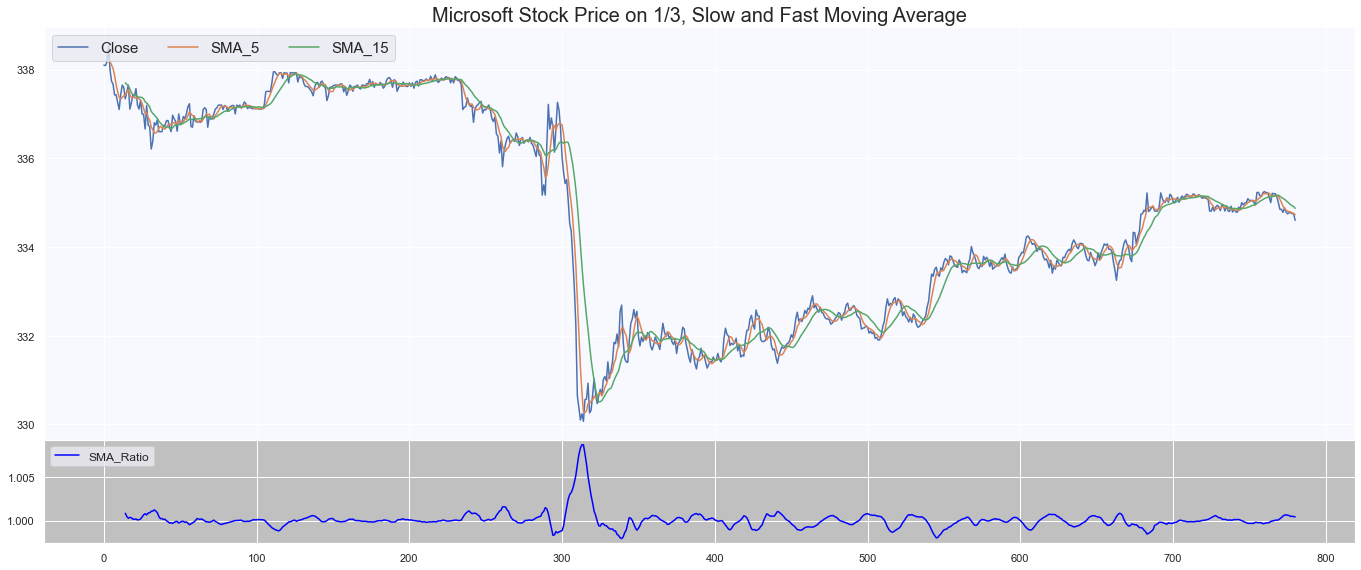

In [8]:
#Plotting
# start = dt.datetime.strptime('2022-01-03 08:00:00', '%Y-%m-%d %H:%M:%S')
# end = dt.datetime.strptime('2022-01-03 23:58:00', '%Y-%m-%d %H:%M:%S')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='MSFT'].loc[:780,['Close','SMA_5','SMA_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Microsoft Stock Price on 1/3, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='MSFT'].loc[:780,['SMA_ratio']], color = 'blue')
ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

# 1 Hour Predict Interval

In [9]:
all_data['Close_Shifted'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.shift(-59))
all_data['Target'] = ((all_data['Close_Shifted'] - all_data['Open'])/(all_data['Open']) * 100).shift(-1)
all_data['Target_Direction'] = np.where(all_data['Target']>0,1,0)
all_data = all_data.dropna().copy()

# Define our target variables for the random forest

In [10]:
Target_variables = ['SMA_ratio','ATR_5','ATR_15','ATR_Ratio',
                       'ADX_5','ADX_15','SMA_Volume_Ratio','Stochastic_5','Stochastic_15','Stochastic_Ratio',
                      'RSI_5','RSI_15','RSI_ratio','MACD']
for variable in Target_variables:
    all_data.loc[:,variable] = mstats.winsorize(all_data.loc[:,variable], limits = [0.1,0.1])

# Train from Jan to Sep, Test from Oct to Dec


In [11]:
# all_data.index = pd.to_datetime(all_data.index)

train_data = all_data.loc[:128787,]
test_data = all_data.loc[128787:] 
len(train_data), len(test_data)

(128011, 27034)

In [12]:
X_train = train_data.loc[:,Target_variables]
Y_train = train_data.loc[:,['Target_Direction']]

# Create validation curve for the random forest classifier

Optimize the hyperparameters of the random forest algorithm for a specific dataset by visualizing the relationship between model performance and the values of the hyperparameters

Text(0.5, 1.0, 'Validation Curve Score for n_estimators')

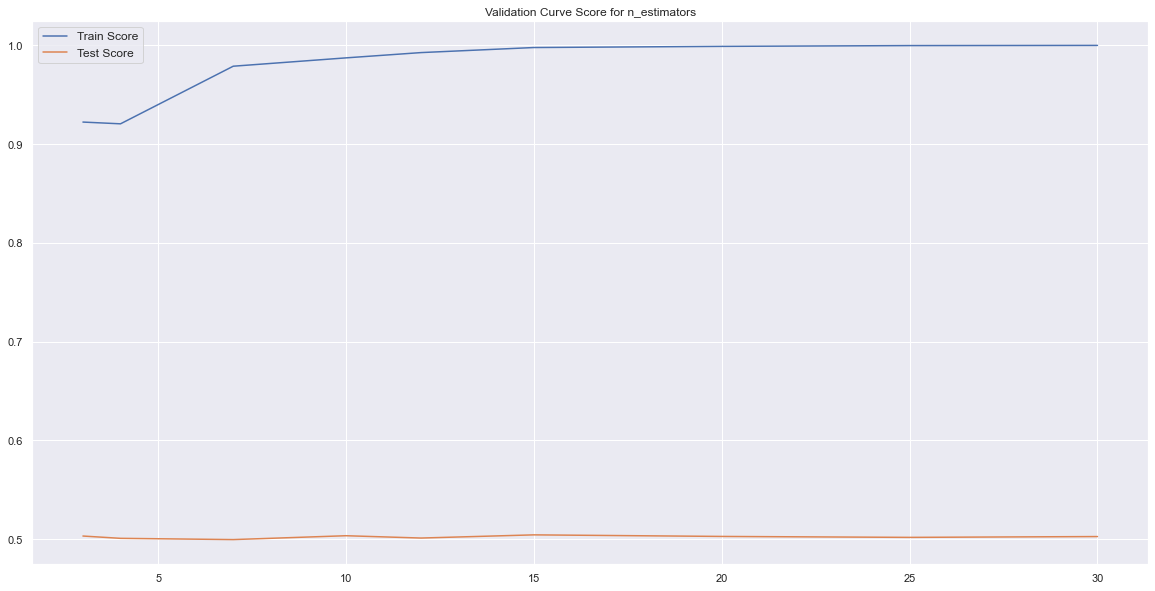

In [13]:
#Separate between X and Y
X_train = train_data.loc[:,Target_variables]

Y_train = train_data.loc[:,['Target_Direction']]

#Create validation curve for the Random Forest Classifier
rf = RandomForestClassifier()
train_scoreNum, test_scoreNum = validation_curve(rf,
                                X = X_train[:], y = Y_train.loc[:,'Target_Direction'], 
                                param_name = 'n_estimators', 
                                param_range = [3,4,7,10,12,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,4,7,10,12,15,20,25,30],train_scores_mean)
plt.plot([3,4,7,10,12,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for n_estimators', fontsize = 'large')

# Fit the ranfom forest and save it to pickle file

In [14]:
co_data = all_data.copy()
co_train = co_data[:128787]
co_train = co_train.dropna().copy()
co_train

X_train = co_train.loc[:,Target_variables]

Y_train = co_train.loc[:,['Target_Direction']]

#Define paramters from Validation Curve
params = {'max_depth': [5, 7],
        'max_features': ['sqrt'],
        'min_samples_leaf': [10, 15, 20],
        'n_estimators': [5, 7, 9],
        'min_samples_split':[20, 25, 30]} #Using Validation Curves

rf = RandomForestClassifier()

#Perform a TimeSeriesSplit on the dataset
time_series_split = TimeSeriesSplit(n_splits = 3)


rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = -1, verbose = 20)

#Fit the random forest with our X_train and Y_train
rf_cv.fit(X_train, Y_train)
        
#Save the fited variable into a Pickle file
file_loc = f'{os.getcwd()}\\Pickle_Files\\Cluster_'    
pickle.dump(rf_cv, open(file_loc,'wb'))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/izzyhuang/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/izzyhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# Test model on testing data

### Testing on 9/1 Data

Find the top ten 10 minutes of 9/1 where we have the highest positive return probability

In [21]:
#Testing on 9/1 Data
today = test_data.loc[128787:129560]
def predictor(day_data):
    try:
        pred_for_tomorrow = pd.DataFrame({'Date':[],
                                        'company':[],
                                        'prediction':[]})

        #Predict each stock using the 2nd January Data
        rf_cv =  pickle.load(open(os.getcwd() + f'\\Pickle_Files\\Cluster_', 'rb'))
        best_rf = rf_cv.best_estimator_
        cluster_data = day_data.copy()
        cluster_data = cluster_data.dropna()
        if (cluster_data.shape[0]>0):
            X_test = cluster_data.loc[:,Target_variables]

            pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
                                                                        'company':cluster_data['symbol'],
                                                                        'prediction':best_rf.predict_proba(X_test)[:,1]}), ignore_index = True)
        
        top_10_pred = pred_for_tomorrow.sort_values(by = ['prediction'], ascending = False).head(10)

        for selected_company in top_10_pred['company']:
            actual = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target_Direction']
            pct_change = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target']
            top_10_pred.loc[top_10_pred.company == selected_company,'actual'] = actual
            top_10_pred.loc[top_10_pred.company == selected_company,'pct_change'] = pct_change
        
    except:
        pass
    top_10_pred["Time"] = [time_lookup[i] for i in top_10_pred['Date']]

    return top_10_pred

top_10_pred = predictor(today)
top_10_pred

<ipython-input-21-fc1dc7fcd05d>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,


,Date,company,prediction,Time
745,129549.0,MSFT,0.582408,2022-09-01 23:38:00
738,129527.0,MSFT,0.577793,2022-09-01 22:48:00
747,129551.0,MSFT,0.544520,2022-09-01 23:42:00
36,128823.0,MSFT,0.543037,2022-09-01 08:39:00
739,129528.0,MSFT,0.542071,2022-09-01 22:51:00
695,129482.0,MSFT,0.539757,2022-09-01 21:05:00
748,129552.0,MSFT,0.537519,2022-09-01 23:43:00
381,129168.0,MSFT,0.537510,2022-09-01 15:34:00
743,129547.0,MSFT,0.534319,2022-09-01 23:32:00
506,129293.0,MSFT,0.532906,2022-09-01 17:39:00


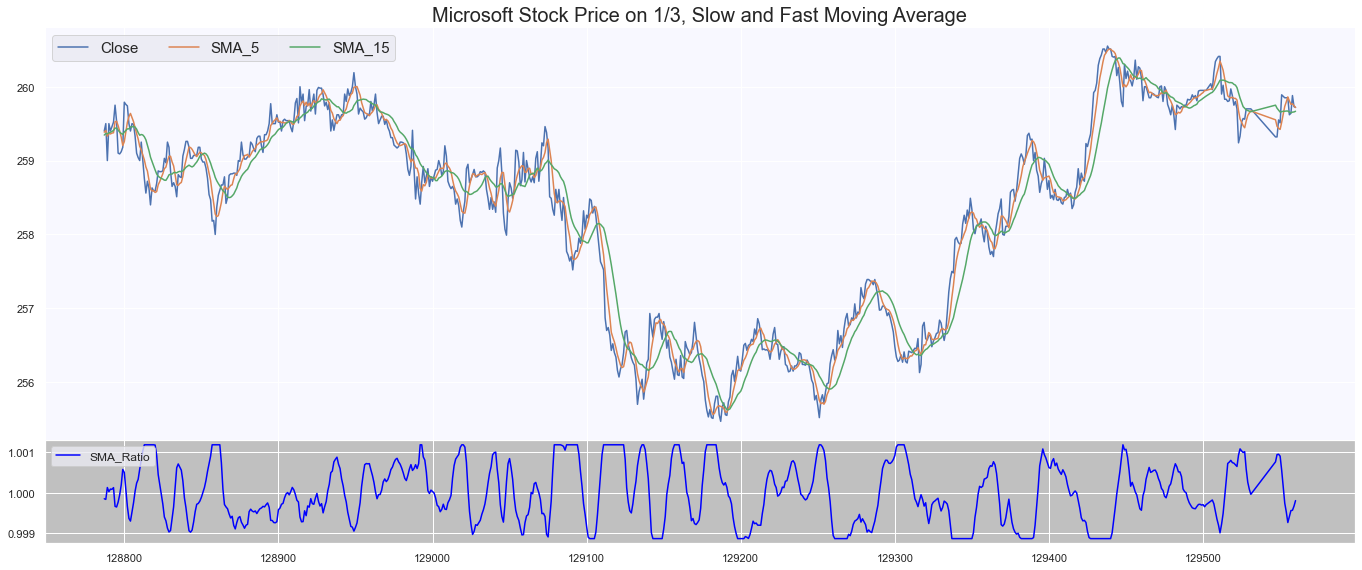

In [18]:
#Plotting
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='MSFT'].loc[128787:129560,['Close','SMA_5','SMA_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Microsoft Stock Price on 1/3, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='MSFT'].loc[128787:129560,['SMA_ratio']], color = 'blue')
ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

### Testing on September Data

Find the top ten 10 minutes of September where we have the highest positive return probability

In [62]:
#Testing on 9/1 to 9/30 Data
today = test_data.loc[128787:144364]

def predictor(day_data):
    try:
        pred_for_tomorrow = pd.DataFrame({'Date':[],
                                        'company':[],
                                        'prediction':[]})

        #Predict each stock using the 2nd January Data
        rf_cv =  pickle.load(open(os.getcwd() + f'\\Pickle_Files\\Cluster_', 'rb'))
        best_rf = rf_cv.best_estimator_
        cluster_data = day_data.copy()
        cluster_data = cluster_data.dropna()
        if (cluster_data.shape[0]>0):
            X_test = cluster_data.loc[:,Target_variables]

            pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
                                                                        'company':cluster_data['symbol'],
                                                                        'prediction':best_rf.predict_proba(X_test)[:,1]}), ignore_index = True)
        
        top_10_pred = pred_for_tomorrow.sort_values(by = ['prediction'], ascending = False).head(10)

        for selected_company in top_10_pred['company']:
            actual = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target_Direction']
            pct_change = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target']
            top_10_pred.loc[top_10_pred.company == selected_company,'actual'] = actual
            top_10_pred.loc[top_10_pred.company == selected_company,'pct_change'] = pct_change
        
    except:
        pass
    top_10_pred["Time"] = [time_lookup[i] for i in top_10_pred['Date']]

    return top_10_pred

top_10_pred = predictor(today)
top_10_pred

<ipython-input-62-6609a3f7ad75>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,


,Date,company,prediction,Time
2143,130978.0,MSFT,0.610781,2022-09-06 23:18:00
745,129549.0,MSFT,0.582408,2022-09-01 23:38:00
738,129527.0,MSFT,0.577793,2022-09-01 22:48:00
847,129651.0,MSFT,0.577789,2022-09-02 10:36:00
7187,136086.0,MSFT,0.576178,2022-09-16 08:32:00
12853,141805.0,MSFT,0.575814,2022-09-27 16:26:00
1509,130314.0,MSFT,0.574068,2022-09-06 09:12:00
9188,138109.0,MSFT,0.573866,2022-09-20 18:00:00
11835,140787.0,MSFT,0.572891,2022-09-26 11:20:00
4336,133235.0,MSFT,0.571348,2022-09-12 12:23:00


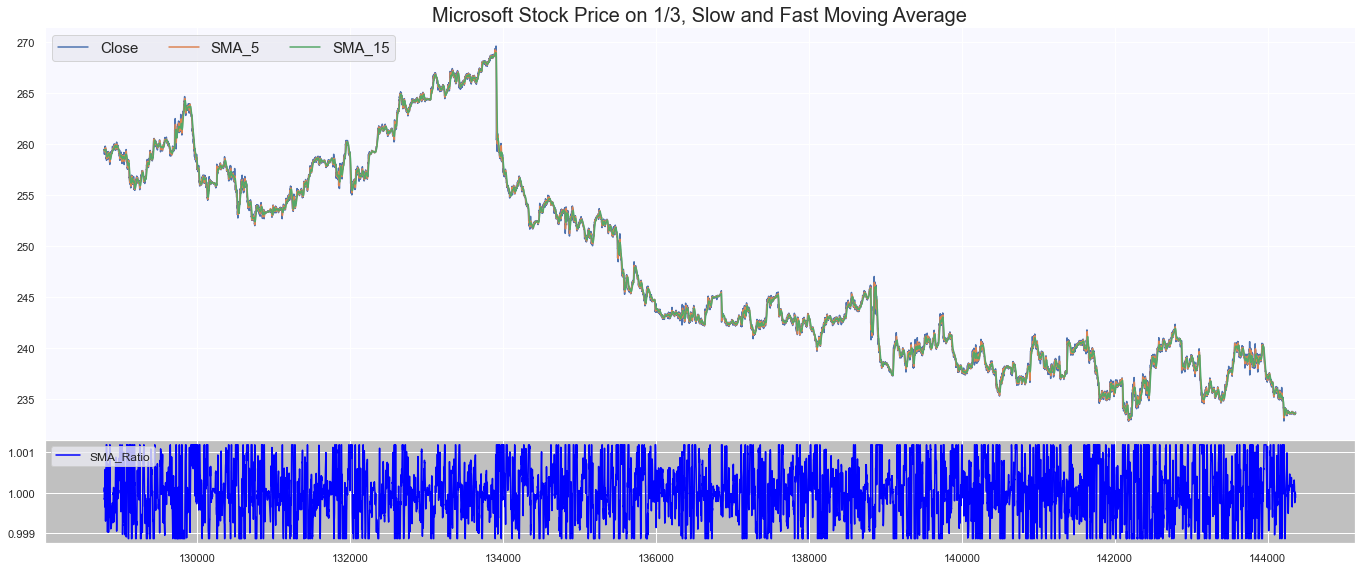

In [63]:
#Plotting
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='MSFT'].loc[128787:144364,['Close','SMA_5','SMA_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Microsoft Stock Price on 1/3, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='MSFT'].loc[128787:144364,['SMA_ratio']], color = 'blue')
ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

### Testing on From 140,000 to 150,000 Data (suppose to have a large spike but model didn't catch)

Find the top ten 10 minutes where we have the highest positive return probability

In [69]:
#Testing on frame 140,000 to 150,000 Data
today = test_data.loc[140000:150000]

def predictor(day_data):
    try:
        pred_for_tomorrow = pd.DataFrame({'Date':[],
                                        'company':[],
                                        'prediction':[]})

        #Predict each stock using the 2nd January Data
        rf_cv =  pickle.load(open(os.getcwd() + f'\\Pickle_Files\\Cluster_', 'rb'))
        best_rf = rf_cv.best_estimator_
        cluster_data = day_data.copy()
        cluster_data = cluster_data.dropna()
        if (cluster_data.shape[0]>0):
            X_test = cluster_data.loc[:,Target_variables]

            pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
                                                                        'company':cluster_data['symbol'],
                                                                        'prediction':best_rf.predict_proba(X_test)[:,1]}), ignore_index = True)
        
        top_10_pred = pred_for_tomorrow.sort_values(by = ['prediction'], ascending = False).head(10)

        for selected_company in top_10_pred['company']:
            actual = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target_Direction']
            pct_change = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target']
            top_10_pred.loc[top_10_pred.company == selected_company,'actual'] = actual
            top_10_pred.loc[top_10_pred.company == selected_company,'pct_change'] = pct_change
        
    except:
        pass
    top_10_pred["Time"] = [time_lookup[i] for i in top_10_pred['Date']]

    return top_10_pred

top_10_pred = predictor(today)
top_10_pred

<ipython-input-69-c53d8ddbb81c>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,


,Date,company,prediction,Time
1789,141805.0,MSFT,0.575814,2022-09-27 16:26:00
5534,145571.0,MSFT,0.573646,2022-12-07 09:31:00
771,140787.0,MSFT,0.572891,2022-09-26 11:20:00
5532,145569.0,MSFT,0.569245,2022-12-07 09:25:00
770,140786.0,MSFT,0.569025,2022-09-26 11:18:00
9013,149050.0,MSFT,0.567848,2022-12-14 19:13:00
691,140707.0,MSFT,0.566673,2022-09-26 09:25:00
6835,146872.0,MSFT,0.566412,2022-12-09 13:40:00
1414,141430.0,MSFT,0.562202,2022-09-27 09:17:00
686,140702.0,MSFT,0.561726,2022-09-26 09:19:00


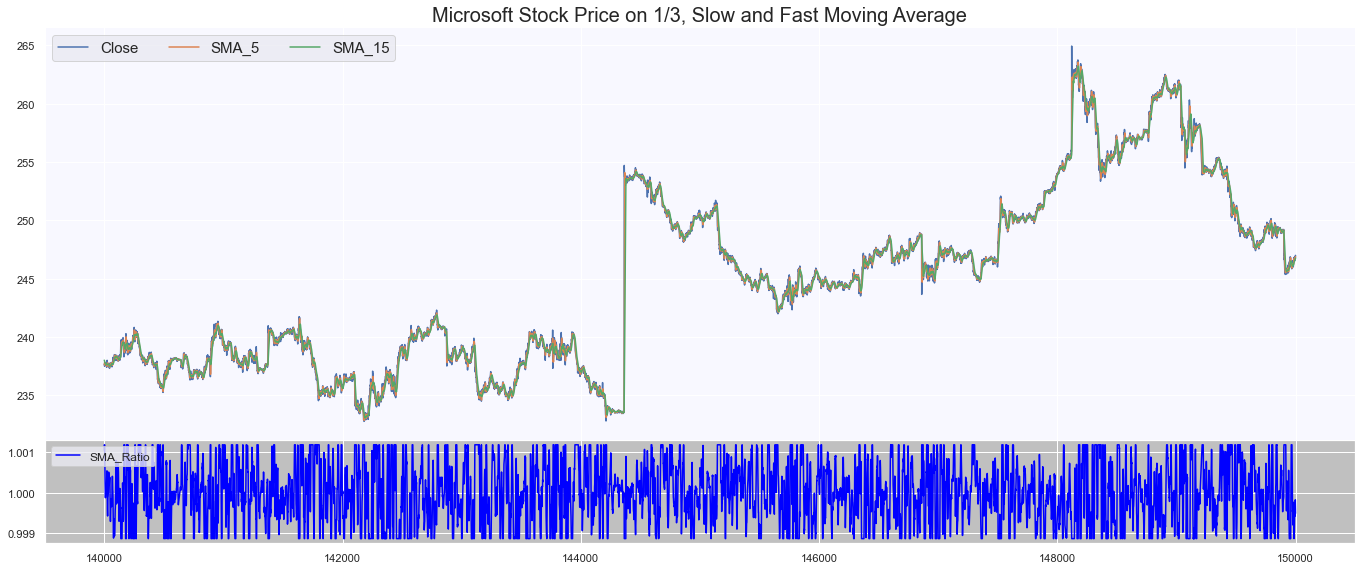

In [68]:
#Plotting
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='MSFT'].loc[140000:150000,['Close','SMA_5','SMA_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Microsoft Stock Price on 1/3, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='MSFT'].loc[140000:150000,['SMA_ratio']], color = 'blue')
ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

# Backtesting

Need to make

In [ ]:
print("hello world")